In [108]:
import pandas as pd
import numpy as np
from pydataset import data
import math as math
import matplotlib.pyplot as plt

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

In [200]:
# 1 
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [204]:
# 1 - 1
#First I created a function that would used as a separate column to hold the average mpg for all cars
#Then I grouped all the cars by manufacturer in order to compare them to one another
#By aggregating the means of both the city and highway mpg, it gave me the averages for each
#The answer is honda on average is the best
performance_by_man = mpg.assign(avg_mpg = (mpg.cty + mpg.hwy) / 2)
by_manufacturer = performance_by_man.groupby('manufacturer').agg({'avg_mpg':'mean','cty':'mean','hwy':'mean'})
by_manufacturer.sort_values(by = ['avg_mpg'], ascending = False).head(1)

,avg_mpg,cty,hwy
manufacturer,,,
honda,28.5,24.444444,32.555556


In [46]:
# 1 - 2
# I first wanted to get all the names of manufacturers that appear at least once
# After I generated a list of unique names from the manufacturer column
# I then used len() to count up the total of unique manufacturers to tell me how many there are in this data set
len(mpg.manufacturer.unique())

15

In [47]:
# 1 - 3
# same process as above, just changed the column to model
len(mpg.model.unique())

38

In [214]:
# 1 - 4
# I used the same function I used above to get the average and create a column with those averages again
# Then using the where function, we were applying any string in trans column that starts with auto and manual
# This was to remove all the extra string for different types of transmissions
# Then after that, we would group by this new column the transmission type and use the agg function to get the averages of all
# Lastly we can compare the two rows to eachother to see manual is the better option
a_and_m = mpg.assign(avg_mpg = (mpg.cty + mpg.hwy) / 2)
a_and_m['trans_type'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')
a_vs_m = a_and_m.groupby('trans_type').agg({'avg_mpg':'mean','cty':'mean','hwy':'mean'})
a_vs_m

,avg_mpg,cty,hwy
trans_type,,,
auto,19.130573,15.968153,22.292994
manual,22.227273,18.675325,25.779221


In [194]:
#2
# Copied dataframe from the exercise
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

In [193]:
#2 - 1a
# I used pd.merge to merge the users and roles data then did the right join under how
pd.merge(
    users,
    roles,
    left_on='role_id', right_on='id', how='right')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [192]:
#2 - 1b
#same process just changed the how to outer for an outer join
pd.merge(
    users,
    roles,
    left_on='role_id', right_on='id', how='outer')

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [ ]:
#2 - 1c
#You'll get an error message because without the foreign keys, they have nothing similar to merge on

In [74]:
#3 - a
#utilized the example we started with and readjusted to access database
def get_db_url(un, hst, pw, db):
    url = (f'mysql+pymysql://{user}:{password}@{host}/{db}')
    return (url)

In [84]:
#3 - b
#used .read_sql to access information from the sql exercises in sequel pro
#then pulled the information from the employees database
pd.read_sql('select * from employees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27
5,10056,1961-09-01,Brendon,Bernini,F,1990-02-01
6,10057,1954-05-30,Ebbe,Callaway,F,1992-01-15
7,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13
8,10059,1953-09-19,Alejandro,McAlpine,F,1991-06-26
9,10060,1961-10-15,Breannda,Billingsley,M,1987-11-02


In [99]:
#3 - c
#changed mysql in url to YOURsql to case the error
def intentional_typo(un, hst, pw, db):
    url = (f'mysql+pyYOURsql://{user}:{password}@{host}/{db}')
    return (url)

In [100]:
#Once I tried to recall the database, it returned the error because the url doesn't exist
pd.read_sql('select * from employees limit 10 offset 50', intentional_typo(user, host, password, 'employees'))

NoSuchModuleError: Can't load plugin: sqlalchemy.dialects:mysql.pyYOURsql

In [101]:
#3 - d
#having a type in your query will also return an error because there is nothing to recall
pd.read_sql('select * from employeeeeees limit 10 offset 50', get_db_url(user, host, password, 'employees'))

ProgrammingError: (pymysql.err.ProgrammingError) (1146, "Table 'employees.employeeeeees' doesn't exist")
[SQL: select * from employeeeeees limit 10 offset 50]
(Background on this error at: http://sqlalche.me/e/13/f405)

In [216]:
#3 - e
#created a function I can call later equal to employees so I can read it
employees = pd.read_sql('select * from employees', get_db_url(user, host, password, 'employees'))
employees

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
...,...,...,...,...,...,...
300019,499995,1958-09-24,Dekang,Lichtner,F,1993-01-12
300020,499996,1953-03-07,Zito,Baaz,M,1990-09-27
300021,499997,1961-08-03,Berhard,Lenart,M,1986-04-21
300022,499998,1956-09-05,Patricia,Breugel,M,1993-10-13


In [217]:
#did the same for titles
titles = pd.read_sql('select * from titles', get_db_url(user, host, password, 'employees'))
titles

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01
443306,499998,Staff,1993-12-27,1998-12-27


Text(0.5, 1.0, 'Employees Per Title')

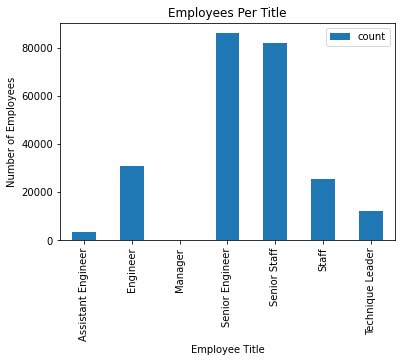

In [224]:
#Once I had this data imported, I was able to created a function that would recall all employees that meet the criteria
#verifying that they are currently employeed
#then once I had that, I grouped by the titles that are now remaining and counted them all using the agg function
#now that I have all the data, I created a bar graph to compare them by title
current = titles[titles['to_date'] >= pd.to_datetime('today')] 
current_emp = current.groupby('title').emp_no.agg(['count'])
current_emp.plot.bar()

plt.xlabel('Employee Title')
plt.ylabel('Number of Employees')
plt.title('Employees Per Title')

In [140]:
#3 - f
# Similar to earlier, used the same process to join the employees and titles data
pd.merge(
    employees,
    titles,
    left_on='emp_no', right_on='emp_no', how='left')

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...,...
443303,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
443304,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
443305,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01
443306,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Staff,1993-12-27,1998-12-27


In [ ]:
#3 - g
#ran out of time and moved on to the next question

In [146]:
#3 - h
# for this problem, I just grouped by the title and took the max of the hire dates to get the most recent
recent_hires = titles_emps.groupby('title').hire_date.agg(['max'])
recent_hires

,max
title,
Assistant Engineer,1999-12-24
Engineer,2000-01-23
Manager,1992-02-05
Senior Engineer,2000-01-01
Senior Staff,2000-01-13
Staff,2000-01-12
Technique Leader,1999-12-15


In [166]:
#4
#imported the chipole data
chipotle_orders = pd.read_sql('select * from orders', get_db_url(user, host, password, 'chipotle'))
chipotle_orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [177]:
#4 - 1
#created a new column that did not have the dollar sign so I can use the functions as a float
# then grouped by the order_id to get each order and then summed up each order useing agg function
price_conversion = chipotle.assign(price = chipotle['item_price'].str.replace('$','').astype(float))
cost = price_conversion.groupby('order_id').price.agg(['sum'])
cost

,sum
order_id,
1,11.56
2,16.98
3,12.67
4,21.00
5,13.70
...,...
1830,23.00
1831,12.90
1832,13.20


In [226]:
#4 - 2
#since quantity was already in an integer format, i just used the sum function to count them up
# then I used the nlargest to return the items with the highest amount
popular_items = chipotle.groupby('item_name').quantity.agg(['sum'])
popular_items.nlargest(3, 'sum', keep='first')

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506


In [218]:
#4 - 3
# same concept as above but this time I used the price column i created that is in a float format to be able to count the total revenue for each item
#then i returned the highest one
highest_revenue_item = price_conversion.groupby('item_name').price.agg(['sum'])
highest_revenue_item.nlargest(1, 'sum', keep='first')

,sum
item_name,
Chicken Bowl,7342.73
